# Trabajo Práctico 1 - Matrices de Insumo Producto

## Enunciado

### Consigna 1 - 

Primero desarrollaremos como pasar del sistema **1** al sistema **2**:  
\begin{align}
p &= A \cdot p + d \\
p - A \cdot p &= d \\
(I - A) \cdot p &= d\\ 
(I - A)^{-1} \cdot (I - A) \cdot p &= (I - A)^{-1} \cdot d\quad (\ast)
\end{align}  

Por propiedades de matrices, $(I-A)^{-1}·(I-A) = I$  
Luego:  
\begin{align}  
p &= (I-A)^{-1}·d
\end{align}  
De esta manera, obtenemos el sistema **2**, el cual analizaremos en el ejercicio.  

####  **(I-A) es inversible:**  
Si (I-A) es inversible, esta misma es unica; y dado un vector demanda **d** $\neq \vec{0}$, podemos decir que existe una unica solucion al sistema **2**. Es decir que $p$ solo puede tomar un unico valor, debido a que calcular $(I-A)^{-1} \cdot d$ es hacer una cuenta con un valor fijo.  

####  **(I-A) es inversible y d = 0:**
Si esto sucede, tendriamos la siguiente ecuacion:  
\begin{align}  
p &= (I-A)^{-1}·0
\end{align}  
Cuya solucion es trivial, $p = \vec{0}$.  (Es decir, una matriz con todos sus elementos 0)  

####  **(I-A) no es inversible:**  
Si ocurre esto, algebraicamente no podria realizar ($\ast$), por ende, tendria que analizar el sistema previo a realizar ese paso, es decir:  
\begin{align}  
(I - A) \cdot p &= d
\end{align}  
Llamando $H = (I-A)$ tengo:  
\begin{align}  
H \cdot p &= d
\end{align}  
Suponiendo que  **d** $\neq \vec{0}$, el sistema puede presentar una de las siguientes dos opciones:  
1.  **Infinitas soluciones:** Como $H = (I-A)$ no es inversible, no existe un unico $p$ que satisfaga la ecuacion. Por ende, de encontrarse alguna solucion, tendrian que existir otras. En termino algebraicos, tendria un **sistema compatible indeterminado**.
2.  **Ninguna solucion:** Este es el caso contrario al item 1. Aqui, cuando tratemos de resolver el sistema, llegaremos a algun absurdo matematico, el cual indica que no es posible hallar una solucion al problema, es decir, tendriamos un **sistema incompatible**.
####  **(I-A) no es inversible y d = 0:**  
Al igual que en el caso anterior, tengo que analizar el sistema  
\begin{align}  
(I - A) \cdot p &= d
\end{align}  
donde en este caso, tendria  
\begin{align}  
(I - A) \cdot p &= \vec{0}
\end{align}  
A diferencia del item anterior, ahora tengo un sistema homogeneo, es decir que siempre tengo al menos una solucion. Pero $(I - A)$ no es inversible. Luego, no existe un unico valor que satisfaga $p$. Por ende, este sistema puede unicamente tener **infinitas soluciones**, osea un **sistema compatible indeterminado**.









### Consigna 2 -  

In [246]:
import funciones as fn

###  Consigna 3


Resolvemos el sistema dado:

In [248]:
import numpy as np

A = np.array([[0.3, 0.0, 0.1], 
              [0.05, 1.0, 0.2], 
              [0.1, 0.15, 0.1]])
d = np.array([100, 100, 300])

# Calcular I - A
I = np.eye(A.shape[0])
x = I - A

# Calcular L, U y P de I - A
XL, XU, XP = fn.calcularLU(x)

# Calcular la inversa de I - A
L = fn.inversaLU(XL, XU, XP)

# Calcular el resultado de p
p = L @ d
print(p)

[   68.96551724 -5149.42528736  -517.24137931]


#### ¿Hay una justificacion economica de los valores encontrados para p?
Los valores negativos en el vector de producción $p$ indican que, bajo los parámetros actuales, la producción requerida en algunos sectores deberia ser negativa, lo cual carece de sentido económico, ya que la producción no puede ser negativa en una economía real. La matriz de Leontief $L$ está diseñada para transformar la demanda externa $d$ en el vector de producción $p$. En un contexto real, esta matriz debería generar valores positivos que representen la cantidad de producción necesaria para satisfacer dicha demanda, asegurando coherencia económica.

#### ¿Cual es la caracterıstica de la matriz que lleva a esta solucion?  
La característica problemática de la matriz se encuentra en el Sector 2, ya que este tiene un coeficiente de 1.0 para sí mismo, lo que indica que requiere una unidad completa de su propio producto para producir una unidad adicional. Esto significa que el sector depende completamente de sí mismo, creando un ciclo cerrado sin posibilidad de reducir insumos. Esta situación representa un desafío considerable para la estabilidad del sistema económico, ya que la estructura de insumos y producción no es sostenible a menos que se realicen ajustes en los coeficientes de insumo entre los sectores.

### Consigna 4 - 

Sabemos que  
\begin{align}  
p &= (I-A)^{-1}·d = L·d
\end{align}  
Llamemos $p′$ a una produccion diferente a la $p$ original, tal que $p′ = p + \Delta p$, con $\Delta p$ la variacion en la produccion.  
Luego:  
\begin{align}  
p′ - p = \Delta p \quad (\ast)
\end{align}  
Ahora, si mi demanda **d** sufre una variacion $d'$ tal que $d ′ = d + (0,0,1)^t$, la produccion total tambien sufrira esa variacion de demanda. Es decir, mi sistema es ahora el siguiente:  
\begin{align}  
p′ &= (I-A)^{-1}·d′ = L \cdot d′
\end{align}  
Entonces:  
\begin{align}  
p′ &= L \cdot (d + (0,0,1)^t) \\
p′ &= L \cdot d + L \cdot (0,0,1)^t
\end{align}  
Por definicion, $L \cdot d = p$
Luego:  
\begin{align}  
p′ &= p + L \cdot (0,0,1)^t \\
p′ - p &= L \cdot (0,0,1)^t
\end{align}  
Finalmente, utilizando $(\ast)$,  logramos encontrar la expresion del vector $\Delta p$ para ese ejemplo
\begin{align}  
\Delta p &= L \cdot (0,0,1)^t
\end{align}

###  Consigna 5


Para encontrar los coeficientes tecnicos de $A$, utilizaremos que $A = ZP^{-1}$, conociendo las siguientes igualdades:  
\begin{align*}
Z &=
\begin{bmatrix}
350 & 0 & 0 \\
50 & 250 & 150 \\
200 & 150 & 550
\end{bmatrix}
\end{align*}
\begin{align*}
P &=
\begin{bmatrix}
1000 & 0 & 0 \\
0 & 500 & 0 \\
0 & 0 & 1000
\end{bmatrix}
\end{align*}  
Como $P$ es una matriz con ceros, excepto en su diagonal, para hallar su inversa, unicamente tendremos que invertir los numeros de la diagonal, obteniendo asi que  
\begin{align*}
P^{-1} &=
\begin{bmatrix}
\frac {1}{1000} & 0 & 0 \\
0 & \frac {1}{500} & 0 \\
0 & 0 & \frac {1}{1000}
\end{bmatrix}
\end{align*}  
Luego, calcularemos  
\begin{align*}
A &=
\begin{bmatrix}
350 & 0 & 0 \\
50 & 250 & 150 \\
200 & 150 & 550
\end{bmatrix}
\cdot
\begin{bmatrix}
\frac {1}{1000} & 0 & 0 \\
0 & \frac {1}{500} & 0 \\
0 & 0 & \frac {1}{1000}
\end{bmatrix} \\
A &=
\begin{bmatrix}
0,35 & 0 & 0 \\
0,05 & 0,5 & 0,15 \\
0,2 & 0,3 & 0,55
\end{bmatrix}
\end{align*}  
Con este valor de A, ya podremos calcular nuestra matriz de Leontief.  
\begin{align*}
L &=
\left(
I - 
\begin{bmatrix}
0,35 & 0 & 0 \\
0,05 & 0,5 & 0,15 \\
0,2 & 0,3 & 0,55
\end{bmatrix}
\right)^{-1} \\
L &=
\begin{bmatrix}
0,65 & 0 & 0 \\
-0,05 & 0,5 & -0,15 \\
-0,2 & -0,3 & 0,45
\end{bmatrix}^{-1}
\end{align*}  
Para calcular L utilizaremos la funcion inversaLU del ejercicio **2**


In [251]:
Z = np.array([[350,0,0] , [50,250,150] , [200,150,550]])
P = np.array([[1000,0,0] , [0,500,0] , [0,0,1000]])
PL, PU, PP = fn.calcularLU(P)
P_inv = fn.inversaLU(PL,PU,PP)
A = Z @ P_inv
X = (np.eye(3) - A)
XL, XU, XP = fn.calcularLU(X)
L = fn.inversaLU(XL, XU, XP)
print(L)

[[1.53846154 0.         0.        ]
 [0.44871795 2.5        0.83333333]
 [0.98290598 1.66666667 2.77777778]]


Redondeando a 2 decimales, nos quedaria:
\begin{align*}
L &=
\begin{bmatrix}
1,54 & 0 & 0 \\
0,45 & 2,50 & 0,83 \\
0,98 & 0,67 & 2,78
\end{bmatrix}
\end{align*}

###  Consigna 6

Al igual que en ejercicio 4, llamaremos $p′$ y $\Delta p$ a una nueva produccion y a una variacion en la produccion original, respectivamente; Tal que $p′ = p + \Delta p$.  
A su vez, llamaremos $d′$ y $\Delta d$ a una nueva demanda y a una variacion en la demanda original respectivamente, tal que $d′ = d + \Delta d$  
Estas definiciones tambien se aplicaran a $p$ y $d$ de cada region.  

\
Ahora bien, tomando el sistema *4* y suponiendo que hay una variacion en la demanda como se indica en el ejercicio, tendremos:  
\begin{align*}
(\begin{bmatrix}
I & 0 \\
0 & I
\end{bmatrix}
- 
\begin{bmatrix}  
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{bmatrix})
\begin{bmatrix}
p′^r \\
p′^s
\end{bmatrix}
&= 
\begin{bmatrix}
d′^r \\
d′^s
\end{bmatrix}
\end{align*}  
Calculando el lado derecho del sistema llegamos a lo siguiente:  
\begin{align*}
\begin{bmatrix}  
(I_{nxn} - A^{rr}) \cdot p′^r - A^{rs} \cdot p′^s \\
-A^{sr} \cdot p′^r + (I_{mxm} - A^{ss}) \cdot p′^s
\end{bmatrix}
&=
\begin{bmatrix}
d′^r \\
d′^s
\end{bmatrix}
\end{align*}  
Sabiendo que $p′ = p + \Delta p$ y $d′ = d + \Delta d$, tendriamos el siguiente sistema de ecuaciones:  
\begin{equation}
\begin{cases}
    (I_{nxn} - A^{rr}) \cdot (p^r + \Delta p^r) - A^{rs} \cdot (p^s + \Delta p^s) &= &d^r + \Delta d^r \\
    -A^{sr} \cdot (p^r + \Delta p^r) + (I_{mxm} - A^{ss}) \cdot (p^s + \Delta p^s) &= &d^s + \Delta d^s
\end{cases}
\end{equation}  
Distribuyendo las $p$ de ambas ecuaciones, y separando los terminos que estan siendo multiplicados por $p$ y los que estan siendo multiplicados por $\Delta p$, el sistema nos queda la siguiente manera:  
\begin{equation}
\begin{cases}
    ((I_{nxn} - A^{rr}) \cdot p^r - A^{rs} \cdot p^s) + ((I_{nxn} - A^{rr}) \cdot \Delta p^r - A^{rs} \cdot \Delta p^s) &= &d^r + \Delta d^r \\
    (-A^{sr} \cdot p^r + (I_{mxm} - A^{ss}) \cdot p^s) + (-A^{sr} \cdot \Delta p^r + (I_{mxm} - A^{ss}) \cdot \Delta p^s) &= &d^s + \Delta d^s
\end{cases}
\end{equation}  
Por definicion, sabemos que  
\begin{equation}
\begin{cases}
    ((I_{nxn} - A^{rr}) \cdot p^r - A^{rs} \cdot p^s) &=  &d^r \\
    (-A^{sr} \cdot p^r + (I_{mxm} - A^{ss}) \cdot p^s) &= & d^s
\end{cases}
\end{equation}  
Es decir, que reemplazando en el sistema original nos queda  
\begin{equation}
\begin{cases}
    d^r + ((I_{nxn} - A^{rr}) \cdot \Delta p^r - A^{rs} \cdot \Delta p^s) &= &d^r + \Delta d^r \\
    d^s + (-A^{sr} \cdot \Delta p^r + (I_{mxm} - A^{ss}) \cdot \Delta p^s) &= &d^s + \Delta d^s
\end{cases}
\end{equation}  
Cancelando de ambos lados $d^r$ y $d^s$ llegamos finalmente al siguiente sistema:  
\begin{equation}
\begin{cases}
    (I_{nxn} - A^{rr}) \cdot \Delta p^r - A^{rs} \cdot \Delta p^s &= &  \Delta d^r \\
    -A^{sr} \cdot \Delta p^r + (I_{mxm} - A^{ss}) \cdot \Delta p^s &= & \Delta d^s
\end{cases}
\end{equation}  
En este mismo, se puede calcular la variacion de la produccion de las regiones **s** y **r**, segun la variacion de la demanda que sufran respectivamente.  
Para el caso particular que propone que propone el ejericicio 6), tendremos una variacion nula en la demanda de la region **s**. Es decir, $\Delta d^s = 0$.  
El sistema quedaria de la siguiente manera:  
\begin{equation}
\begin{cases}
    (I_{nxn} - A^{rr}) \cdot \Delta p^r - A^{rs} \cdot \Delta p^s &= &  \Delta d^r \quad &(1)\\
    -A^{sr} \cdot \Delta p^r + (I_{mxm} - A^{ss}) \cdot \Delta p^s &= & 0 \quad &(2)
\end{cases}
\end{equation}  
A partir del cual podremos calcular la variacion de la produccion de la region r, osea $\Delta p^r$.  
De la ecuacion $(2)$ podremos despejar $\Delta p^s$ en funcion de $\Delta p^r$ de la siguiente manera, para luego reemplazarlo en la ecuacion $(1)$  
\begin{align}
-A^{sr} \cdot \Delta p^r + (I_{mxm} - A^{ss}) \cdot \Delta p^s &=  0 \\
(I_{mxm} - A^{ss}) \cdot \Delta p^s &=  A^{sr} \cdot \Delta p^r \\
\end{align}  
Dado que la produccion y la demanda estan ligados uno al otro, una variacion en la demanda tendra consigo una variacion en la produccion en cualquier caso, y ademas, este cambio de produccion tiene que ser unico. En otras palabras, dado un $\Delta d$ obtendria un unico $\Delta p$. Debido a esto, es ilogico suponer que dado un cierto $\Delta d$, pueden existir infinitos $\Delta p$, que $\Delta d = 0$, o por el contrario, no existir ninguno.  
Luego, utilizando el ejercicion **1**, podemos afirmar que $(I_{mxm} - A^{ss})$ es inversible.  
Por consecuente,  
\begin{align}
\Delta p^s &=  (I_{mxm} - A^{ss})^{-1} \cdot A^{sr} \cdot \Delta p^r \\
\end{align}  
Esta igualdad de \Delta p^s la reemplazaremos en la ecuacion $(1)$, teniendo asi la siguiente ecuacion:  
\begin{align}
(I_{nxn} - A^{rr}) \cdot \Delta p^r - A^{rs} \cdot (I_{mxm} - A^{ss})^{-1} \cdot A^{sr} \cdot \Delta p^r &=   \Delta d^r \\
((I_{nxn} - A^{rr})  - A^{rs} \cdot (I_{mxm} - A^{ss})^{-1} \cdot A^{sr}) \cdot \Delta p^r &=   \Delta d^r
\end{align}  
Por el mismo motivo mencionado anteriormente, $(I_{nxn} - A^{rr})  - A^{sr} \cdot (I_{mxm} - A^{ss})^{-1} \cdot A^{rs}$ debera ser inversible.  
\begin{align}
\Delta p^r &=  (I_{nxn} - A^{rr}  - A^{rs} \cdot (I_{mxm} - A^{ss})^{-1} \cdot A^{sr})^{-1} \cdot \Delta d^r
\end{align}  
De esta manera, llegamos a la formula de la variacion de la produccion de la region **r** para las variaciones de demanda dadas en el ejercicio.

###  Consigna 7

Cargamos el archivo como dataframe y seteamos el index en la columna que necesitamos

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import funciones as fn

archivo = "./matrizlatina2011_compressed_0.xlsx"
df = pd.read_excel(archivo, sheet_name='LAC_IOT_2011')
df.set_index('Country_iso3', inplace=True)

Extraemos ambas matrices insumo-producto

In [254]:
matriz_PRY_a_SLV = df.loc['PRY', 'SLVs1':'SLVs40']
matriz_SLV_a_PRY = df.loc['SLV', 'PRYs1':'PRYs40']
print("La matriz insumo producto de Paraguay a El Salvador es: ", matriz_PRY_a_SLV)
print("La matriz insumo producto de El Salvador a Paraguay es: ", matriz_SLV_a_PRY)
matriz_PRY_a_SLV =matriz_PRY_a_SLV.to_numpy()
matriz_SLV_a_PRY = matriz_SLV_a_PRY.to_numpy()

La matriz insumo producto de Paraguay a El Salvador es:                       SLVs1         SLVs2  SLVs3         SLVs4         SLVs5  \
Country_iso3                                                                  
PRY           3.916000e-06  0.000000e+00    0.0  0.000000e+00  1.022900e-05   
PRY           0.000000e+00  0.000000e+00    0.0  0.000000e+00  0.000000e+00   
PRY           0.000000e+00  0.000000e+00    0.0  0.000000e+00  0.000000e+00   
PRY           0.000000e+00  0.000000e+00    0.0  0.000000e+00  0.000000e+00   
PRY           0.000000e+00  0.000000e+00    0.0  0.000000e+00  0.000000e+00   
PRY           0.000000e+00  0.000000e+00    0.0  0.000000e+00  0.000000e+00   
PRY           0.000000e+00  0.000000e+00    0.0  0.000000e+00  0.000000e+00   
PRY           0.000000e+00  0.000000e+00    0.0  0.000000e+00  0.000000e+00   
PRY           0.000000e+00  0.000000e+00    0.0  0.000000e+00  0.000000e+00   
PRY           0.000000e+00  0.000000e+00    0.0  0.000000e+00  0.000000e+0

Luego, extraemos el p (output) de cada país.
Notamos que, cuando generamos la matriz P diagonal de SLV, su determinante es 0, luego no es inversible. Para salvar esto, vamos a poner unos donde haya ceros en el output. Ahora sí, creamos la matriz P cuya diagonal contiene los valores para el output de cada sector

In [255]:
outputPRY = df.loc['PRY', 'Output']
outputSLV = df.loc['SLV', 'Output']
outputPRY = outputPRY.to_numpy()
outputSLV= outputSLV.to_numpy()

outputSLV[outputSLV == 0] = 1

P_PRY= np.diag(outputPRY.flatten())
P_SLV= np.diag(outputSLV.flatten())

Para conseguir la matriz de coeficientes técnicos vamos a usar que sabemos que $A = ZP^{-1}$ con Z la matriz de flujo de capitales y P el output de los sectores

In [256]:
P_PRYL, P_PRYU, P_PRYP = fn.calcularLU(P_PRY)
P_inv_PRY = fn.inversaLU(P_PRYL,P_PRYU,P_PRYP)
P_SLVL, P_SLVU, P_SLVP = fn.calcularLU(P_SLV)
P_inv_SLV = fn.inversaLU(P_SLVL, P_SLVU, P_SLVP)
matriz_intrarregional_PRY = df.loc['PRY','PRYs1': 'PRYs40']
matriz_intrarregional_SLV = df.loc['SLV','SLVs1' : 'SLVs40'] 

print("La matriz A de coeficientes técnicos de PRY a SLV  es:", matriz_PRY_a_SLV @ P_inv_PRY)
print("La matriz A de coeficientes técnicos de SLV a PRY es:", matriz_SLV_a_PRY @ P_inv_SLV)
print("La matriz A de coeficientes técnicos intrarregional de PRY es:", matriz_intrarregional_PRY @ P_inv_PRY)
print("La matriz A de coeficientes técnicos intrarregional de SLV es:", matriz_intrarregional_SLV @ P_inv_SLV)


La matriz A de coeficientes técnicos de PRY a SLV  es: [[5.22315075e-10 0.00000000e+00 0.00000000e+00 ... 3.45487030e-12
  1.86332659e-11 1.48792922e-10]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.55654160e-09 4.55172847e-08 0.00000000e+00 ... 1.16301299e-07
  2.00718142e-07 9.54020010e-08]
 [4.67149213e-09 8.58108852e-08 0.00000000e+00 ... 7.14486921e-08
  7.69595958e-08 7.04793348e-08]]
La matriz A de coeficientes técnicos de SLV a PRY es: [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000

Ahora, desarrollaremos la aplicación de los shocks en la demanda.
Primero conseguiremos $A^{rr}$ y el vector de producción inicial para calcular la demanda inicial a partir de la ecuación $d^{r} = (I - A^{rr})p^{r}$ que despejamos de la ecuación para el cálculo total del producto de la región r

In [265]:
A_rr = matriz_intrarregional_PRY @ P_inv_PRY  
# Identidad para calcular (I - A)
I = np.eye(A_rr.shape[0])

# Vector de producción inicial (output antes del shock)
p_inicial = outputPRY 

# Calculamos la demanda inicial 
demanda_inicial = (I - A_rr) @ p_inicial

Ahora copiamos la demanda para despues poder compararlas pre-shock y post-shock, y luego aplicamos los shocks sobre la demanda.

In [267]:
demanda_post_shock = demanda_inicial.copy()

# Shock negativo del 10% en s05 (posición 4) y un shock positivo del 3.3% en s06, s07, s08 (posiciones 5, 6, 7)
demanda_post_shock.iloc[4] *= (0.90)
demanda_post_shock.iloc[5] *= (1.033)
demanda_post_shock.iloc[6] *= (1.033)
demanda_post_shock.iloc[7] *= (1.033)

Recalculamos la producción total después del shock en la demanda usando la matriz de Leontief y recalculamos $A^{rr}$ post shock

In [269]:
ImenosA_rrL, ImenosA_rrU, ImenosA_rrP = fn.calcularLU(I- A_rr)
p_post_shock = fn.inversaLU(ImenosA_rrL,ImenosA_rrU,ImenosA_rrP) @ demanda_post_shock

p_post_shock = np.diag(p_post_shock.flatten())

p_post_shockL, p_post_shockU, p_post_shockP = fn.calcularLU(p_post_shock)
A_rr_postshock = matriz_intrarregional_PRY @ fn.inversaLU(p_post_shockL,p_post_shockU,p_post_shockP)

Recalculamos la producción total en PRY después del shock utilizando la ecuación del modelo de región simple. Esto es $ \Delta p^{r} = (I - A^{rr})^{-1}\Delta d^{r}$

In [271]:
ImenosA_rr_postshockL, ImenosA_rr_postshockU, ImenosA_rr_postshockP = fn.calcularLU(I-A_rr_postshock)

delta_p_post_shock_simple = fn.inversaLU(ImenosA_rr_postshockL,ImenosA_rr_postshockU,ImenosA_rr_postshockP) @ (demanda_post_shock - demanda_inicial)

print("Producción total en PRY (modelo de región simple):")
print(delta_p_post_shock_simple)

Producción total en PRY (modelo de región simple):
[-8.03166753e+01 -3.09039533e-04  0.00000000e+00 -4.61323864e-02
 -2.54169545e+02  3.24881075e+01  6.52302519e+00  6.72083187e+01
 -8.93681565e-02 -1.03392970e-06 -5.44481929e-01 -3.30412647e-01
 -1.08076824e-01 -1.76668978e+00 -2.09620023e+00  0.00000000e+00
  3.78926038e-01 -6.86639979e-01 -7.01899073e-01 -1.13359206e+00
 -1.40193388e-01 -5.38050428e-02 -1.23620990e-02 -2.46073044e-01
 -6.44155990e-02  0.00000000e+00 -4.59312551e-02  0.00000000e+00
 -3.17985020e-02 -7.15280418e-03  0.00000000e+00 -2.87617431e-03
 -5.56731098e+00 -2.51077750e+00 -4.23940773e-01 -8.84175818e+00
 -3.81028618e+00 -6.16171635e+00 -6.77741988e+00 -4.27138245e+01]


Ahora para el modelo completo, calculamos $A^{ss}$. Luego tenemos las matrices A_rr_postshock ($A^{rr}$), A_post_shock_SLV ($A^{ss}$), y las interacciones interregionales ($A^{rs}$ y $A^{sr}$)

In [273]:
A_post_shock_SLV = matriz_intrarregional_SLV @ fn.inversaLU(p_post_shockL, p_post_shockU, p_post_shockP)

A_rr = A_rr_postshock  # Matriz de coeficientes técnicos intra-regionales para P1
A_rs = matriz_PRY_a_SLV @ p_post_shock  # Relaciones interregionales de PRY a SLV
A_sr = matriz_SLV_a_PRY @ P_SLV # Relaciones interregionales de SLV a PRY
A_ss = A_post_shock_SLV  # Matriz de coeficientes técnicos intra-regionales para P2

Ahora procederemos a calcular $ \Delta p^{r}$ según el modelo completo

In [275]:
# Inversa de (I - A_ss) para SLV
Imenos_A_ss = np.eye(A_ss.shape[0]) - A_ss
Imenos_A_ssL, Imenos_A_ssU,Imenos_A_ssP = fn.calcularLU(Imenos_A_ss)

inversa_A_ss = fn.inversaLU(Imenos_A_ssL, Imenos_A_ssU, Imenos_A_ssP)

a, b, c =fn.calcularLU(I - A_rr - A_rs @ inversa_A_ss @ A_sr)

delta_p_post_shock_completo = fn.inversaLU(a, b, c) @ (demanda_post_shock - demanda_inicial)

print("Producción total en PRY (modelo completo de dos regiones):")
print(delta_p_post_shock_completo)

Producción total en PRY (modelo completo de dos regiones):
[-7.84758049e+01  4.38439453e-05  0.00000000e+00  3.34428482e+00
 -2.53640751e+02  3.24906074e+01  6.57072328e+00  6.79996132e+01
  1.74626763e-01 -1.57225646e-06 -8.94475930e-01  1.00584974e-01
 -3.07292338e-02  2.39799060e+00 -1.94954837e+02  0.00000000e+00
 -3.10619394e-01 -1.06910320e+00 -2.85474689e-01 -3.10203014e+00
  5.67541387e+00  8.64701363e-02  1.98671413e-02  6.26874293e-01
  3.74401153e+00  0.00000000e+00  2.66965069e+00  0.00000000e+00
  1.84821627e+00  7.22676950e-03  0.00000000e+00 -2.38790575e-03
 -8.46599207e+00  1.51306765e+00  6.42907124e+01 -4.47292180e+00
  7.06752027e+02 -1.67317885e+00  6.82092194e+01  6.05988033e+00]


A continuación, realizaremos un gráfico para comparar las diferencias de $ \Delta p^{r} $ según el modelo utilizado

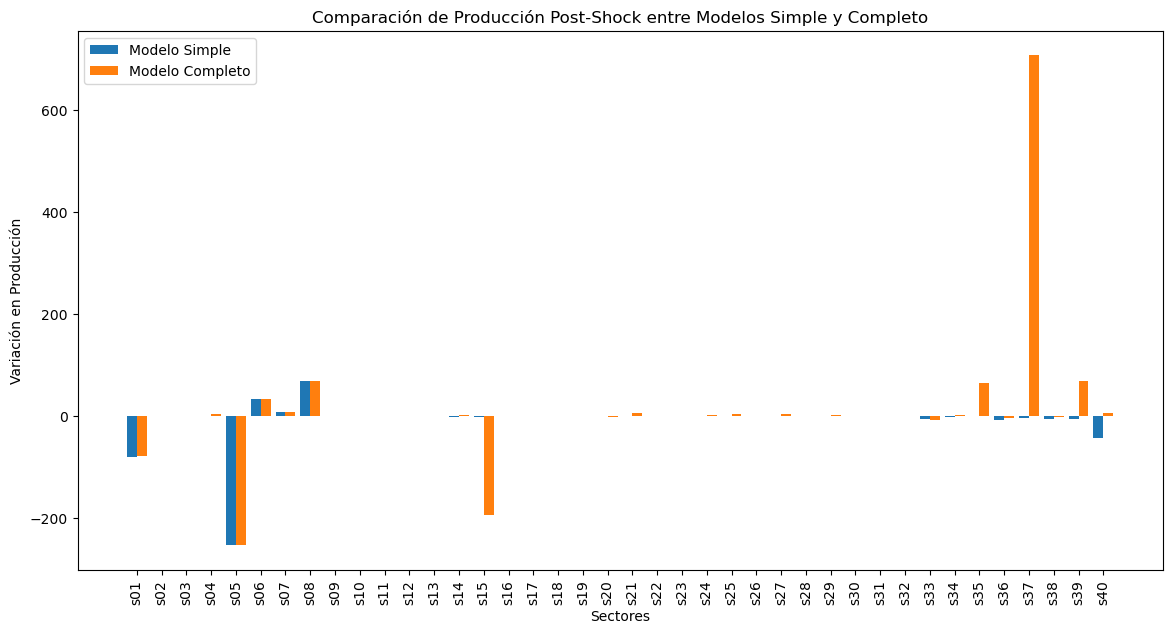

In [277]:

sectores = ['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10', 
            's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 
            's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 
            's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's40']


x = np.arange(len(sectores))
width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))
bars_simple = ax.bar(x - width/2, delta_p_post_shock_simple, width, label='Modelo Simple')
bars_completo = ax.bar(x + width/2, delta_p_post_shock_completo, width, label='Modelo Completo')

# Configuración de etiquetas
ax.set_xlabel('Sectores')
ax.set_ylabel('Variación en Producción')
ax.set_title('Comparación de Producción Post-Shock entre Modelos Simple y Completo')
ax.set_xticks(x)
ax.set_xticklabels(sectores, rotation=90)
ax.legend()

plt.tight_layout
plt.show()


Ahora que calculamos la producción utilizando ambos modelos, podemos analizar como se modifica la misma en cada caso.
El modelo de región simple refleja únicamente cómo los sectores de P1 (en este caso Paraguay) reaccionan a los shocks aplicados a la demanda. Este enfoque tiende a subestimar la realidad económica de una región que de hecho está profundamente relacionada con otras. No considerar esto puede llevarnos a conclusiones erróneas acerca de cómo los shocks afectan a la producción de una región.
Sobre el modelo completo (el cual incluye las relaciones interregionales, en este caso, entre Paraguay y El Salvador) podemos decir que captura cómo los cambios en la demanda en P1 no sólo afecta a la producción en P1, sino también a la producción en P2, lo que a su vez retroalimenta a P1, lo cuál resulta mucho más preciso para capturar los efectos reales de los shocks que no se capturan en el modelo simple.

Conclusión: 

Aunque en nuestro caso no se observa tanto la diferencia entre los resultados de calcular $ \Delta p^{r} $ a partir de los dos modelos, lo cuál creemos que se debe a la baja interrelación que hay entre estas dos regiones, podemos concluir que el modelo completo tiende a ser más sensible a los shocks que el modelo de región simple por considerar las interacciones económicas entre P1 y P2. Esto implica que, en economías altamente interconectadas, los efectos de un shock en la demanda pueden extenderse más allá de una única región, lo que subraya la importancia de tener en cuenta las interacciones interregionales para poder hacer conclusiones más precisas.

Correcciones: 
- En todos los lugares donde habíamos usado np.linalg.inv, lo cambiamos por la función inversaLU hecha previamente.
- Agregamos dos gráficos para ayudar a comprender en qué sectores impacta el shock, además de una conclusión.


Realizaremos gráficos con porcentajes para ver cuanto varío la producción según cada modelo. Esto nos ayudará a comprender en qué sectores impacta el shock aplicado sobre los 4 sectores del enunciado.

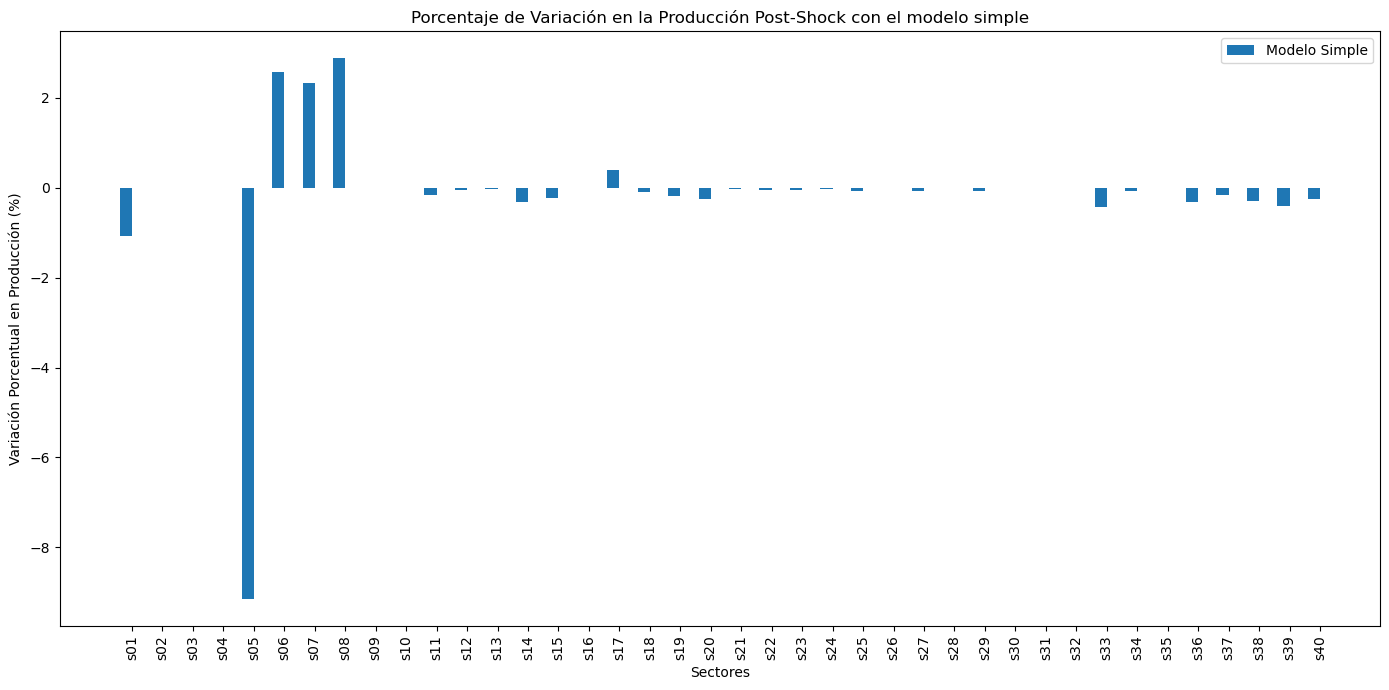

In [281]:
produccion_pre_shock = p_inicial   

var_perc_simple = (delta_p_post_shock_simple / produccion_pre_shock) *100

fig, ax = plt.subplots(figsize=(14, 7))

bars_simple_perc = ax.bar(x - width/2, var_perc_simple, width, label='Modelo Simple')

ax.set_xlabel('Sectores')
ax.set_ylabel('Variación Porcentual en Producción (%)')
ax.set_title('Porcentaje de Variación en la Producción Post-Shock con el modelo simple')
ax.set_xticks(x)
ax.set_xticklabels(sectores, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

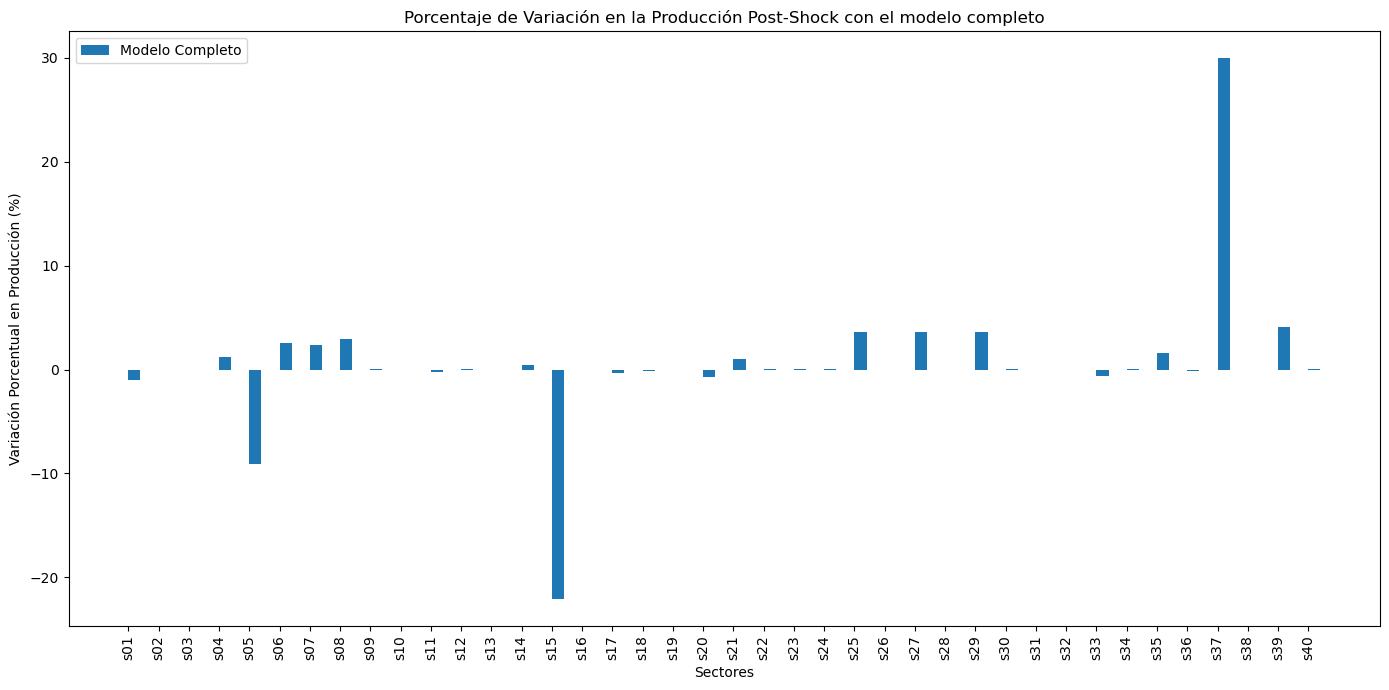

In [283]:
produccion_pre_shock = p_inicial 

var_perc_completo = (delta_p_post_shock_completo / produccion_pre_shock) * 100

fig, ax = plt.subplots(figsize=(14, 7))
bars_completo_perc = ax.bar(x + width/2, var_perc_completo, width, label='Modelo Completo')

ax.set_xlabel('Sectores')
ax.set_ylabel('Variación Porcentual en Producción (%)')
ax.set_title('Porcentaje de Variación en la Producción Post-Shock con el modelo completo')
ax.set_xticks(x)
ax.set_xticklabels(sectores, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


Análisis de los gráfico:

Diferencias por modelo: 
En algunos sectores, las variaciones porcentuales son más significativas en el modelo completo, lo que refleja el impacto de las 
interrelaciones entre sectores que contempla este mismo.
Aunque en general, las variaciones porcentuales son pequeñas, lo que sugiere que el shock aplicado no ha tenido un efecto 
drástico en la mayoría de los sectores, aunque en algunos casos sí hay diferencias notables entre los modelos. Podemos relacionar esto con 
el bajo flujo comercial entre los países, y los cambios drásticos podemos relacionarlos con que hay algunos sectores que están más 
interrelacionados entre sí y, en particular, con los sectores en donde hemos aplicado el shock.
